# Understanding Logistic Regression Tables

Using the same code as in the previous exercise, try to interpret the summary table.

### More information about the dataset: 
Note that <i> interest rate</i> indicates the 3-month interest rate between banks and <i> duration </i> indicates the time since the last contact was made with a given consumer. The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. The <i>March</i> and <i> May </i> are Boolean variables that account for when the call was made to the specific customer and <i> credit </i> shows if the customer has enough credit to avoid defaulting.

<i> Notes: 
    <li> the first column of the dataset is an index one; </li>
    <li> you don't need the graph for this exercise; </li>
    <li> the dataset used is much bigger </li>
</i>

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [8]:
raw_data = pd.read_csv('Bank-data.csv')
data = raw_data.copy()
data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [9]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [10]:
data['y'] = data['y'].map({'yes':1,'no':0})
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


### Declare the dependent and independent variables

Use 'duration' as the independent variable.

In [11]:
y = data['y']
x1 = data['duration']

### Simple Logistic Regression

Run the regression.

In [12]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


### Interpretation

In [13]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sat, 09 Feb 2019   Pseudo R-squ.:                  0.2121
Time:                        10:45:21   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
                                        LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [14]:
np.exp(0.0051)

1.005113027136717

 The odds of duration are pretty close to 1. This tells us that although duration is a significant predictor, a change in 1 day would barely affect the regression.

Note that we could have inferred that from the coefficient itself.

Finally, note that the data is not standardized (scaled) and duration is a feature of a relatively big order of magnitude.

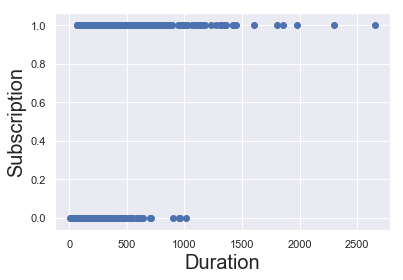

In [15]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y,color = 'C0')
# Don't forget to label your axes!
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

# Expand the Model

In [16]:
# To avoid writing them out every time, we save the names of the estimators of our model in a list. 
estimators=['interest_rate','march','credit','previous','duration']

X1 = data[estimators]
y = data['y']

In [45]:
X = sm.add_constant(X1)
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.514     
Dependent Variable: y                AIC:              360.7836  
Date:               2019-02-09 11:46 BIC:              386.2834  
No. Observations:   518              Log-Likelihood:   -174.39   
Df Model:           5                LL-Null:          -359.05   
Df Residuals:       512              LLR p-value:      1.2114e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.0211   0.3113 -0.0677 0.9460 -0.6313  0.5891
interest_rate     -0.8001   0.0895 -8.9434 0.0000 -0.9755 -0.6248
march             -1.8322   0.3297 -5.5563 0.0000 -2.4785 -1.1859
credit             2.3585   1.0875  2.1688 0.0301  0.2271  4.4900
previous           1.5363   0.5010  3.0666 0.0022  0.5544  2.5182
duration           0.0070   0.0007  9.3810 0.0000  0.0055  0.0084
=================================================================

"""

In [48]:
results_logit.pred_table()

array([[218.,  41.],
       [ 30., 229.]])

In [50]:
cm_df = pd.DataFrame(results_logit.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0s',1:'Actual 1s'})
cm_df

,Predicted 0,Predicted 1
Actual 0s,218.0,41.0
Actual 1s,30.0,229.0


## Create Confusion Matrix

In [37]:
def confusion_matrix(data,actual_values,model):
    
    # Confusion matrix 

            # Parameters
            # ----------
            # data: data frame or array
                # data is a data frame formatted in the same way as your input data (without the actual values)
                # e.g. const, var1, var2, etc. Order is very important!
            # actual_values: data frame or array
                # These are the actual values from the test_data
                # In the case of a logistic regression, it should be a single column with 0s and 1s

            # model: a LogitResults object
                # this is the variable where you have the fitted model 
                # e.g. results_log in this course
            # ----------

     #Predict the values using the Logit model
    pred_values = model.predict(data)
    # Specify the bins 
    bins=np.array([0,0.5,1])
    # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
    # if they are between 0.5 and 1, they will be considered 1
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    # Return the confusion matrix and
    return cm, accuracy


In [38]:
confusion_matrix(X,y,results_logit)

(array([[218.,  41.],
        [ 30., 229.]]), 0.862934362934363)

In [53]:
cm_df



,Predicted 0,Predicted 1
Actual 0s,218.0,41.0
Actual 1s,30.0,229.0


In [54]:
con_mat = np.array(cm_df)
accuracy_train = (con_mat[0,0]+con_mat[1,1]/con_mat.sum())
accuracy_train

218.44208494208493

# Test the Model

In [55]:
test = pd.read_csv('Bank-data-testing.csv')

In [56]:
test

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no
5,5,0.697,0.0,1.0,4.0,0.0,131.0,no
6,6,0.639,1.0,0.0,0.0,0.0,215.0,yes
7,7,4.120,0.0,0.0,0.0,0.0,499.0,no
8,8,1.281,0.0,1.0,1.0,0.0,809.0,yes
9,9,4.966,0.0,0.0,0.0,0.0,389.0,no


In [57]:
test = test.drop(['Unnamed: 0'], axis = 1)
test['y'] = test['y'].map({'yes':1,'no':0})
test.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0


In [69]:
test_actual = test['y']
test_data = test.drop(['y','may'],axis=1)
test_data= sm.add_constant(test_data)
##Rearrange columns
column_names = ['const','interest_rate','march','credit','previous','duration']
test_data = test_data[column_names]
test_data.head()

,const,interest_rate,march,credit,previous,duration
0,1.0,1.313,1.0,0.0,0.0,487.0
1,1.0,4.961,0.0,0.0,0.0,132.0
2,1.0,4.856,1.0,0.0,0.0,92.0
3,1.0,4.120,0.0,0.0,0.0,1468.0
4,1.0,4.963,0.0,0.0,0.0,36.0


In [70]:
X.head()

,const,interest_rate,march,credit,previous,duration
0,1.0,1.334,1.0,0.0,0.0,117.0
1,1.0,0.767,0.0,0.0,1.0,274.0
2,1.0,4.858,1.0,0.0,0.0,167.0
3,1.0,4.120,0.0,0.0,0.0,686.0
4,1.0,4.856,1.0,0.0,0.0,157.0


In [73]:
cm = confusion_matrix(test_data,test_actual,results_logit)
cm


(array([[93., 18.],
        [13., 98.]]), 0.8603603603603603)

In [74]:
cm_test = pd.DataFrame(cm[0])
cm_test.columns = ['Predicted 0','Predicted 1']
cm_test = cm_test.rename(index={0:'Actual 0s',1:'Actual 1s'})
cm_test

,Predicted 0,Predicted 1
Actual 0s,93.0,18.0
Actual 1s,13.0,98.0


In [75]:
print ('Missclassification Rate: '+str((13.0+18.0)/(93+98+13+18)))

Missclassification Rate: 0.13963963963963963
